In [93]:
import pandas as pd
import numpy as np

In [94]:
df = pd.read_csv('laptops.csv')

In [95]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [96]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [97]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [98]:
import matplotlib as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

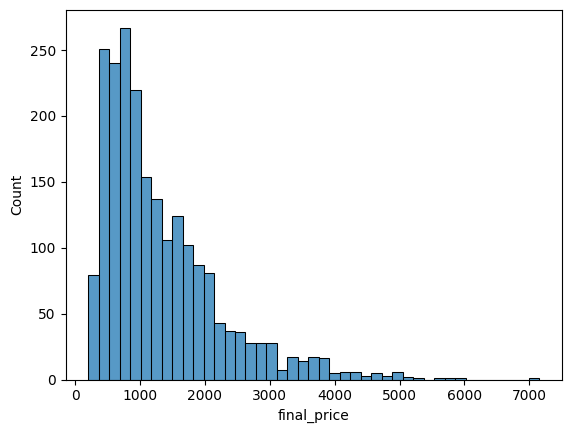

In [99]:
sns.histplot(df['final_price'])

## Question 1

In [100]:
main_df = df[['ram', 'storage', 'screen', 'final_price']]
main_df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [101]:
main_df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

## Question 2

In [102]:
main_df['ram'].median()

16.0

## Question 3

In [103]:
n = len(df)

n_test =  int(n * 0.2)
n_val =  int(n * 0.2)
n_train = n - (n_test + n_val)

n_test, n_val, n_train

(432, 432, 1296)

In [104]:
df_train = main_df.iloc[:n_train]
df_val = main_df.iloc[n_train: n_train + n_val]
df_test = main_df.iloc[n_train + n_val:]

df_train

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
1291,8,256,15.6,689.08
1292,8,256,15.6,481.60
1293,8,512,15.6,541.55
1294,8,512,14.0,803.61


In [105]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [106]:
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [107]:
df_train = main_df.iloc[idx[:n_train]]
df_val = main_df.iloc[idx[n_train: n_train + n_val]]
df_test = main_df.iloc[idx[n_train + n_val:]]

In [108]:
df_train

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
...,...,...,...,...
1777,8,256,14.0,549.00
183,32,1000,16.0,1999.00
137,16,512,15.6,1059.00
899,16,512,14.0,1671.00


In [109]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [110]:
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [111]:
y_train = df_train.final_price.values  
y_test = df_test.final_price.values 
y_val = df_val.final_price.values 

In [112]:
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

In [113]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [114]:
X_train_zero = df_train.fillna(0).values
X_train_zero

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [115]:
screen_mean = df_train['screen'].mean()
X_train_mean = df_train.fillna(screen_mean).values
X_train_mean

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [116]:
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
y_pred_zero = w0_zero + X_train_zero.dot(w_zero)
y_pred_zero

array([2377.35987681,  398.02076576, 2435.12627415, ..., 1255.89731808,
       1313.66371541, 1313.66371541])

<Axes: ylabel='Count'>

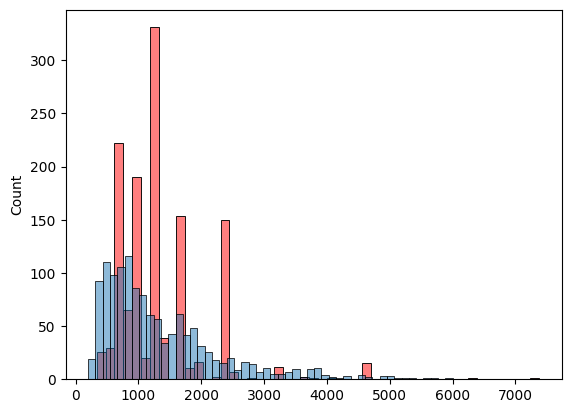

In [117]:
sns.histplot(y_pred_zero, color='red', alpha =0.5, bins = 50)
sns.histplot(y_train, alpha = 0.5, bins =50)

In [118]:
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0_mean + X_train_mean.dot(w_mean)
y_pred_mean

array([2380.46558232,  403.23698821, 2452.75795532, ..., 1252.72169651,
       1325.01406951, 1325.01406951])

In [119]:
def rmse(y, y_pred):
    error = y - y_pred
    se = (error ** 2).mean()
    rmse = np.sqrt(se)
    return rmse

In [120]:
round(rmse(y_train, y_pred_zero), 2)


602.39

In [121]:
round(rmse(y_train, y_pred_mean), 2)

602.18

## Question 4

In [122]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [123]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred = w0 + X_train_zero.dot(w)

    score = rmse(y_train, y_pred)
    print(score)

602.3920520606714
602.3920547636963
602.3923179443269
602.4147595644097
602.7094989558278
603.1259465075947
604.9878055675412


## Question 5

In [124]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n = len(df)

n_test_v2 =  int(n * 0.2)
n_val_v2 =  int(n * 0.2)
n_train_v2 = n - (n_test + n_val)
scores = []
for s in seeds:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_train = main_df.iloc[idx[:n_train_v2]]
    df_val = main_df.iloc[idx[n_train_v2: n_train_v2 + n_val_v2]]
    df_test = main_df.iloc[idx[n_train_v2 + n_val_v2:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.final_price.values  
    y_test = df_test.final_price.values 
    y_val = df_val.final_price.values

    del df_train['final_price']
    del df_test['final_price']
    del df_val['final_price']
    
    X_train_zero = df_train.fillna(0).values

    w0, w = train_linear_regression(X_train_zero, y_train)
    
    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores.append(score)
print(scores)

[565.4520868770983, 636.7985423056728, 588.9558697907958, 597.8148920012524, 571.9627915111038, 573.2383256618933, 647.343832840719, 550.4398184485982, 587.3335036169883, 576.1017929433114]


In [128]:
std = np.std(scores)
round(std, 3)

29.176

## Question 6

In [127]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
    
df_train = main_df.iloc[idx[:n_train_v2]]
df_val = main_df.iloc[idx[n_train_v2: n_train_v2 + n_val_v2]]
df_test = main_df.iloc[idx[n_train_v2 + n_val_v2:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values  
y_test = df_test.final_price.values 
y_val = df_val.final_price.values

In [129]:
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

In [130]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [131]:
df_full_train.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [132]:
X_full_train = df_full_train.fillna(0).values

In [133]:
y_full_train = np.concatenate([y_train, y_val])

In [134]:
w0, w= train_linear_regression_reg(X_full_train, y_full_train, 0.001)

In [135]:
y_pred = w0 + df_test.dot(w)
score = rmse(y_test, y_pred)
score

608.3000367227697

In [136]:
laptop = df_test.iloc[5].to_dict()
one_laptop_df = pd.DataFrame([laptop])
one_laptop_arr = one_laptop_df.values

In [137]:
y_pred = w0 + one_laptop_arr.dot(w)
y_pred[0]

4546.759164865124

In [138]:
y_test[5]

4499.0